In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
from scipy import stats

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


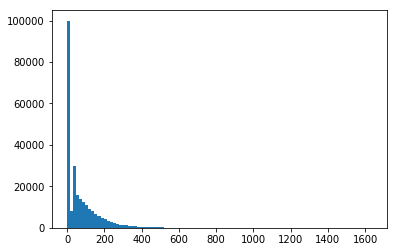

In [4]:
columns = train.columns
columns = columns[2:]
return_ = {}
for feature in columns:
    plt.clf()
    n, bins, patches = plt.hist(train[feature], bins = 100)
    return_[feature] = n, bins
    #plt.savefig(feature)
    

In [5]:
columns = train.columns
columns = columns[2:]
PRI_jet_num_feature = [0,1,2,3]
prediction = ['s', 'b']

0

/Users/wangyunbei/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

<Figure size 2520x1440 with 0 Axes>

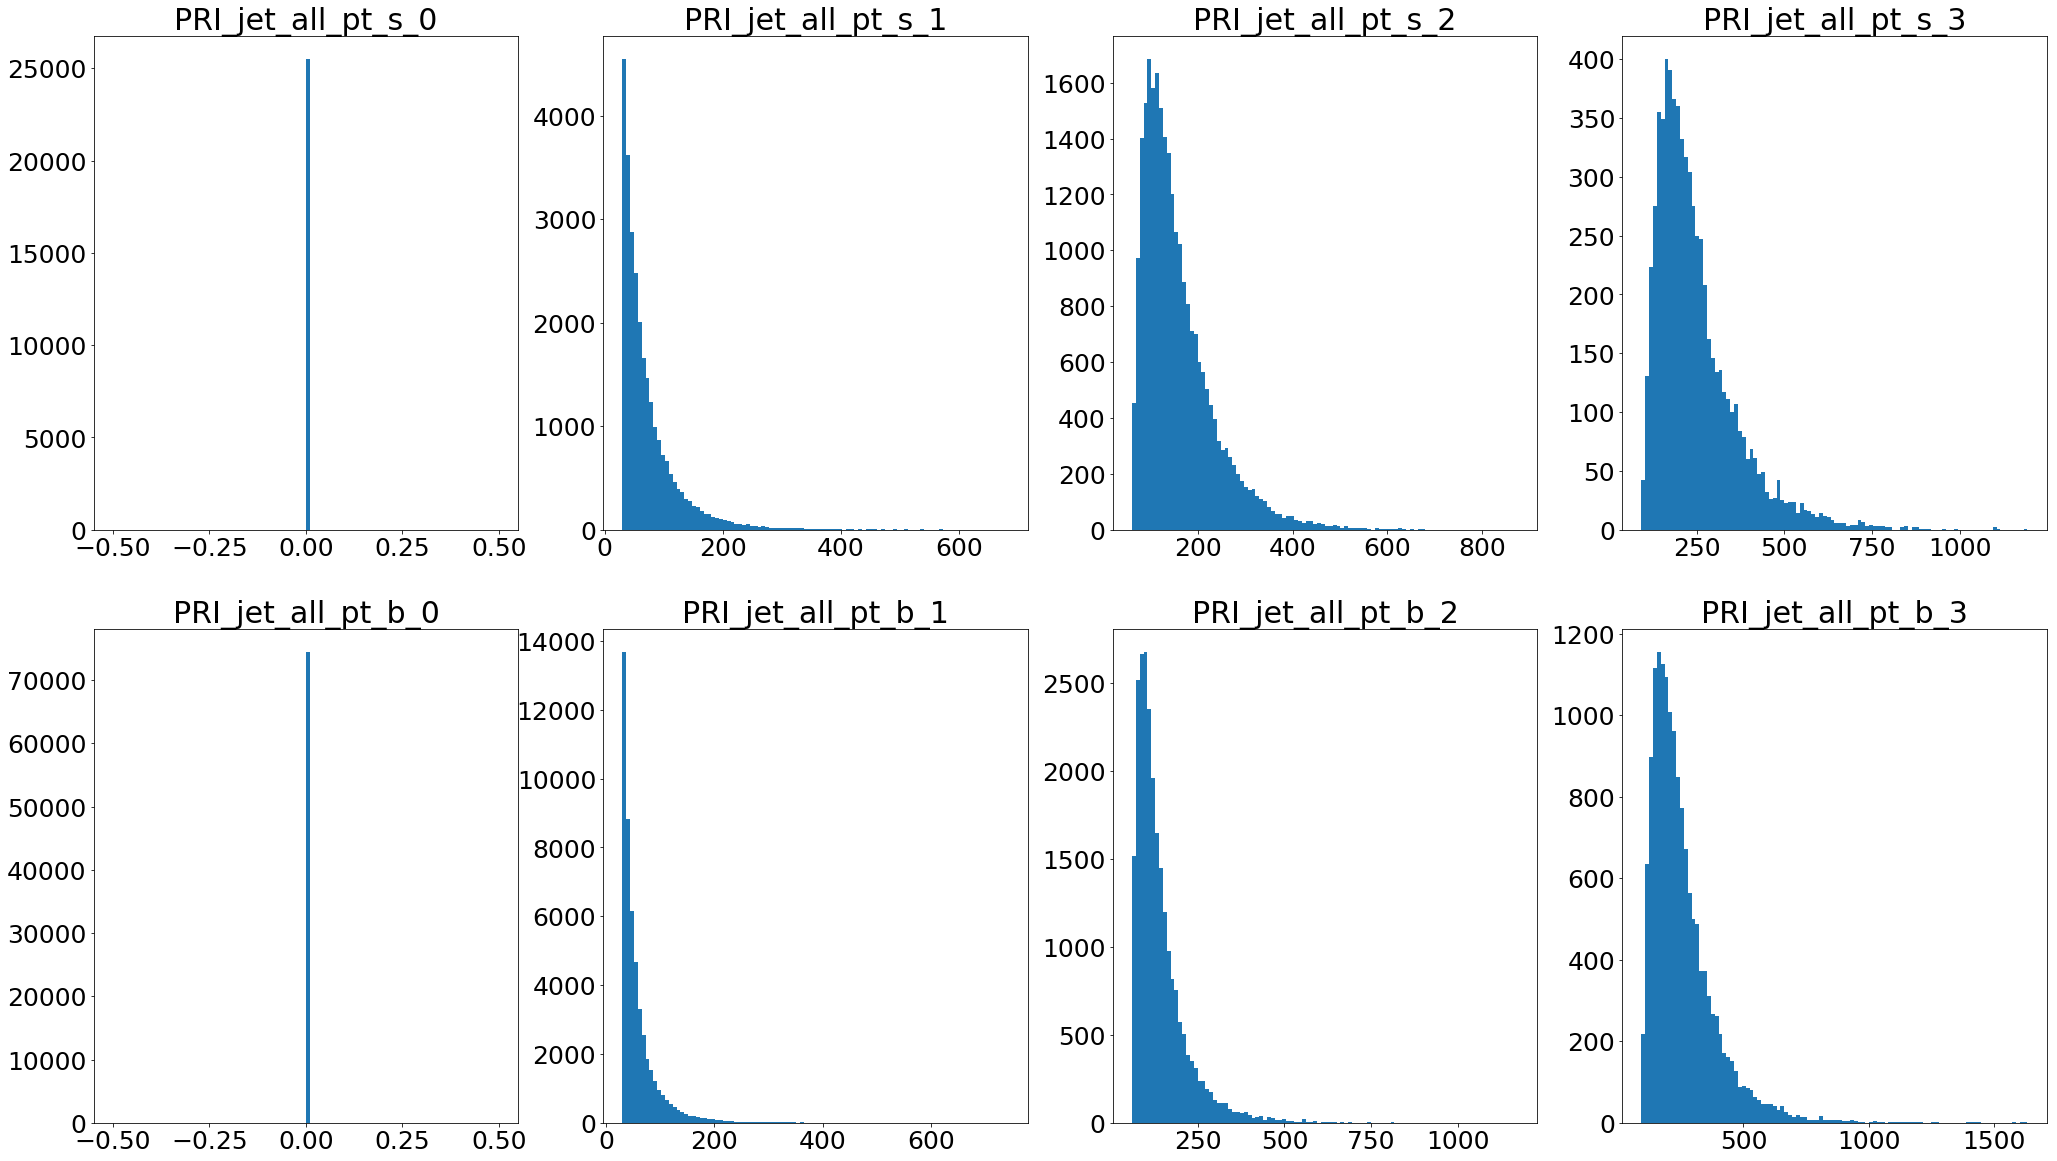

In [32]:
for feature in train.columns.values[2:]:
    plt.clf()
    fig = plt.figure(figsize=(35, 20))
    for j in prediction:
        train_pred = train[train['Prediction'] == j]
        for i in PRI_jet_num_feature:
            loc_plot = prediction.index(j) * 4 + i + 1
            train_PRI_jet_num_selected = train_pred[train_pred['PRI_jet_num'] == i][feature]
            loc = str(24) + str(loc_plot)
            ax1 = fig.add_subplot(loc)
            plt.tick_params(labelsize= 25)
            title_now = feature + '_' + str(j) + '_' + str(i)
            ax1.set_title(title_now, fontdict = {'fontsize': 30})
            ax1.hist(train_PRI_jet_num_selected, bins = 100)
    
    fig.savefig(feature)

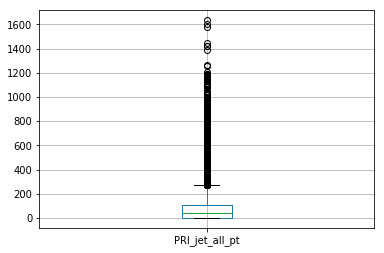

In [30]:
for feature_box in columns:
    plt.clf()
    train.boxplot(feature_box)
    #plt.savefig(feature_box)

In [9]:
train_drop_last0 = train[train.PRI_jet_all_pt != 0]

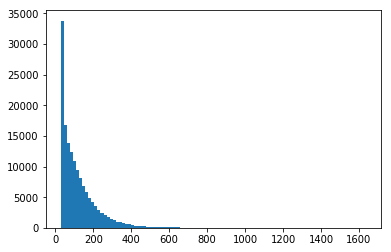

In [10]:
columns_drop_last0 = train_drop_last0.columns
columns_drop_last0 = columns_drop_last0[2:]
return_drop_last0 = {}
for feature_drop_last0 in columns_drop_last0:
    plt.clf()
    n, bins, patches = plt.hist(train_drop_last0[feature_drop_last0], bins = 100)
    return_drop_last0[feature_drop_last0] = n, bins
    #plt.savefig(feature_drop_last0)

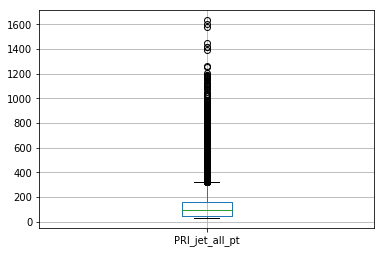

In [11]:
for feature_box_drop_last0 in columns_drop_last0:
    plt.clf()
    train_drop_last0.boxplot(feature_box_drop_last0)
    #plt.savefig(feature_box_drop_last0)